Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [14]:
NAME = "marcojim"
COLLABORATORS = c()  # vector of uniqnames of your collaborators, if any
## IMPORTANT: also enter your group information in Canvas when you upload the assignment

---

In [15]:
library(tidyverse)

# STATS 306
## Problem set 1: plotting with `ggplot`

## Part 1

### Factors
Factors are used in R to represent discrete or categorical variables. We will discuss factors at greater length later in the course. This exercise is designed to show you how `ggplot` handles factors when plotting data.

Use the `tribble()` command to re-create the following small data table. (See the lecture 02 notes for an example of how to use this commmand.) Store your table in a variable called `toy_table`:

```
# A tibble: 4 x 2
      x     y
  <chr> <dbl>
1     a     1
2     b     2
3     c     4
4     d     5
```

In [16]:
# YOUR CODE HERE
toy_table <- tribble(
    ~x, ~y,
    "a",  1,
    "b",  2,
    "c",  4,
    "d",  5
)


Use `ggplot` to generate the following plot from `toy_table`:
![toy table plot](toy_table.svg)

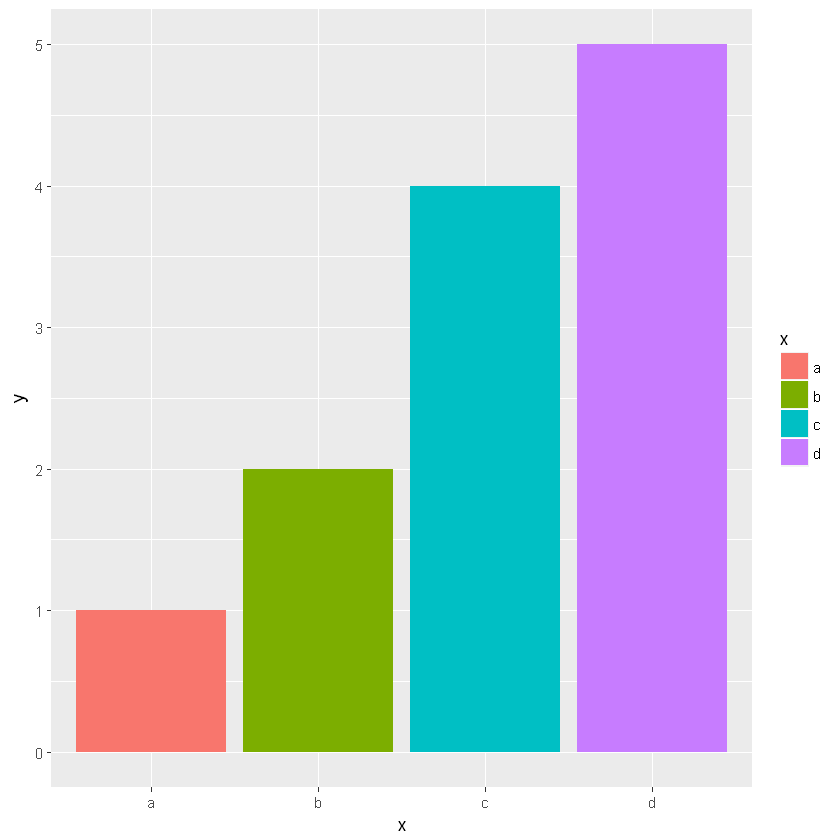

In [17]:
ggplot(data = toy_table) +
  geom_bar(mapping = aes(x = x,y = y, fill = x), stat = "identity")

Suppose that we want to change the ordering of the $x$-axis to be `d c b a`. To do this we need to convert $x$ to a factor and reorder its levels. The syntax for doing this is 
```{r}
factor(x, levels=c('d','c','b','a'))
```
This produces the following plot:
![toy table releveled](toy_table_relevel.svg)

Use this technique to produce a plot where the bars are ordered `c,a,b,d':

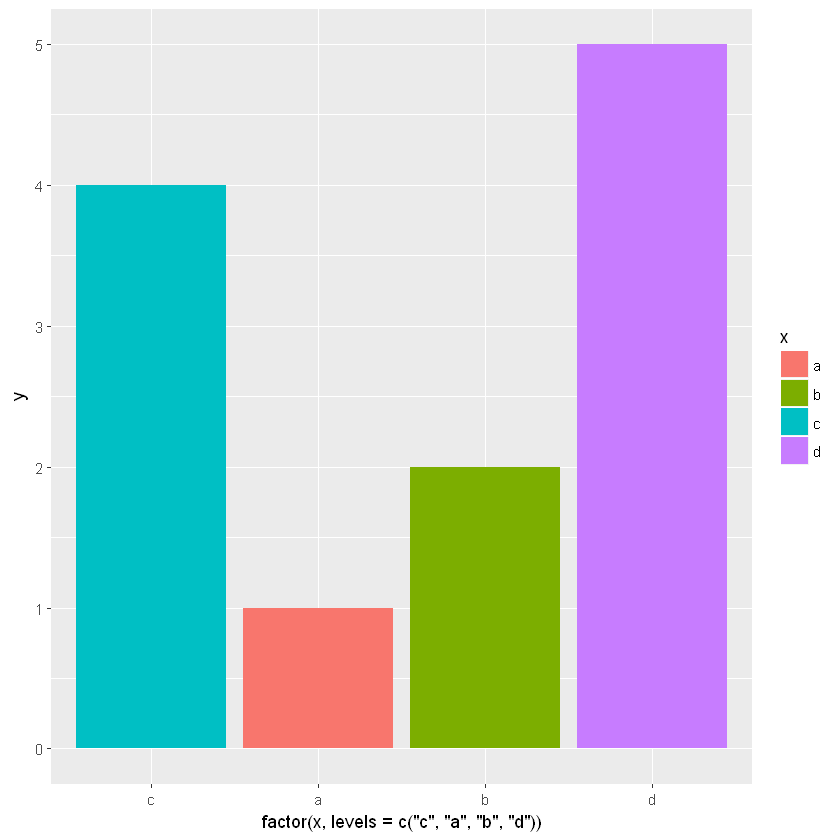

In [18]:
ggplot(data = toy_table) +
  geom_bar(mapping = aes(x = factor(x, levels=c('c','a','b','d')),y = y, fill = x), stat = "identity")

## Part 2
For each of the plots shown below, enter the R code in the cell provided which *exactly reproduces* the plot. (Your could should print this plot in the notebook.)

### Plot 1
![auto plot](p1.svg)

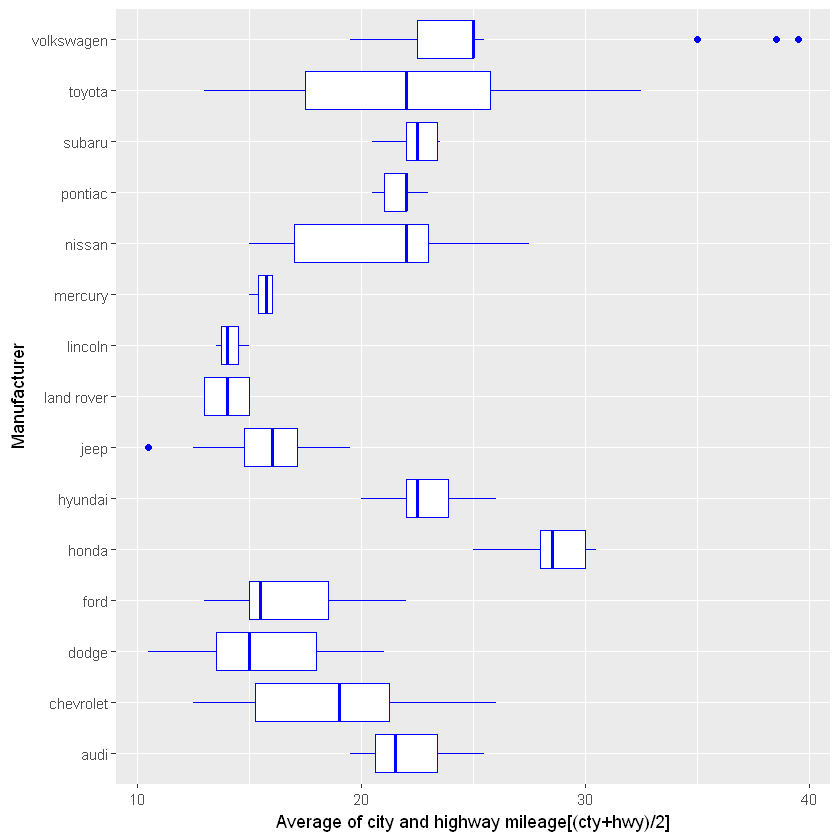

In [19]:
ggplot(data = mpg) +
  geom_boxplot(color="blue",mapping = aes(y=(cty+hwy)/2,x=manufacturer)) + coord_flip() + 
  xlab("Manufacturer") + ylab("Average of city and highway mileage[(cty+hwy)/2]")


## Plot 2
This is using the `midwest` data set which we discussed at the end of lecture 02.
![plot two](p2.svg)

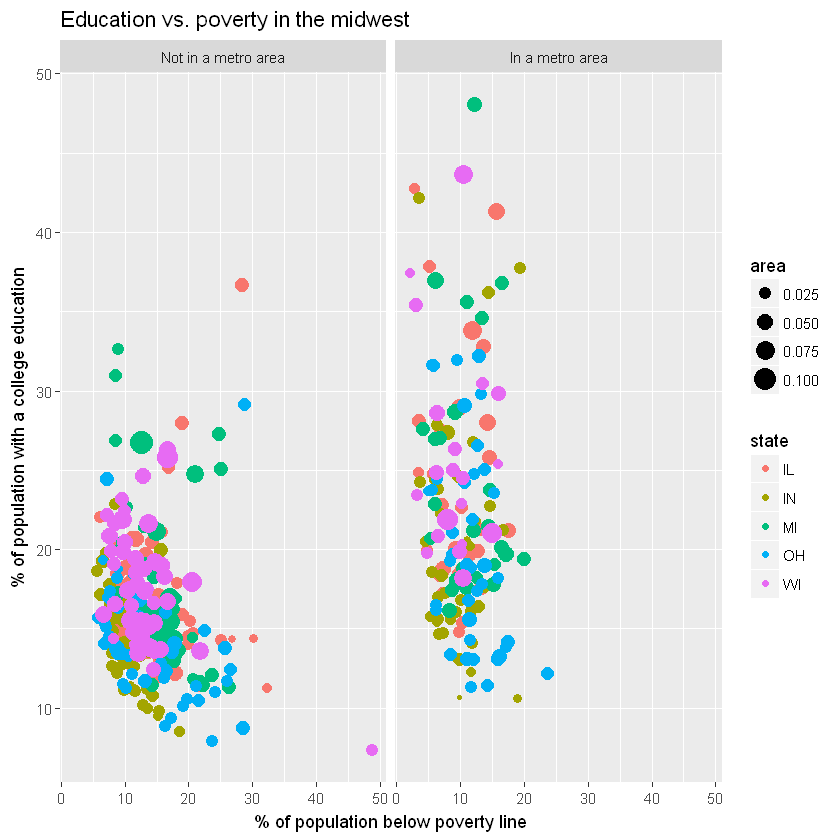

In [20]:

mw <- midwest
lista <- c("0"="Not in a metro area","1"="In a metro area")
ggplot(data=mw) + geom_point(mapping=aes(x=percbelowpoverty,y=percollege,color=state,size=area)) + 
    facet_grid(~ inmetro,labeller=as_labeller(lista)) + xlab("% of population below poverty line") + ylab("% of population with a college education") +
    ggtitle("Education vs. poverty in the midwest")



### Plot 3
(Hint: for this plot, you will need to manually manipulate the ticks on the $y$-axis using the `breaks=` option of the appropriate `scale_y` command.)
![diamonds plot](p3.svg)


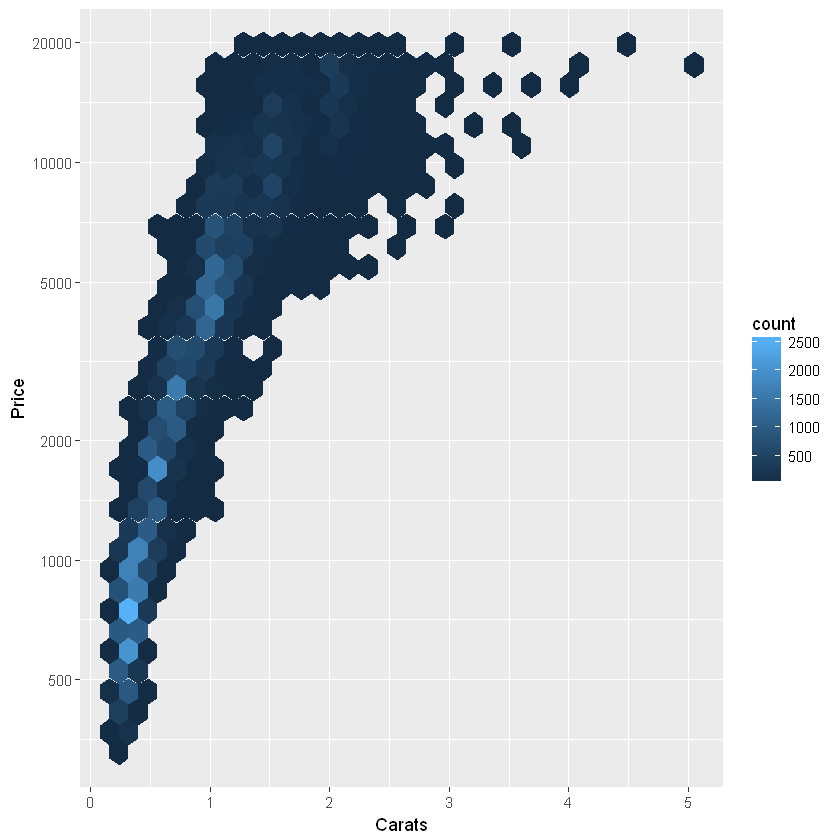

In [21]:
ggplot(data = diamonds) + 
    geom_hex(mapping = aes(x=carat,y=price)) + scale_y_log10("Price", breaks=c(500,1000,2000,5000,10000,20000)) + 
    xlab("Carats")

## Plot 4
In lecture 00 we looked at a database on flights in New York City in 2013. This data set is not part of the `tidyverse` package. You may need to install it using the command:
```{r}
install.packages('nycflights13')
``` 
![plot four](p4.svg)
This plots is average delay time by carrier for the top five carriers. Because we have not yet covered the material needed to compute such an average, the code that does this has been provided for you. Use the resulting dataset, `flights_top5`, to generate the plot.

In [22]:
library(nycflights13)
top5_carriers = group_by(flights, carrier) %>% summarize(departures=n()) %>% 
                ungroup() %>% top_n(5)
flights_top5 =  filter(flights, carrier %in% top5_carriers$carrier) %>% 
                filter(dep_delay>0) %>% group_by(carrier, month) %>% 
                summarize(mean_dep_delay=mean(dep_delay))

Selecting by departures


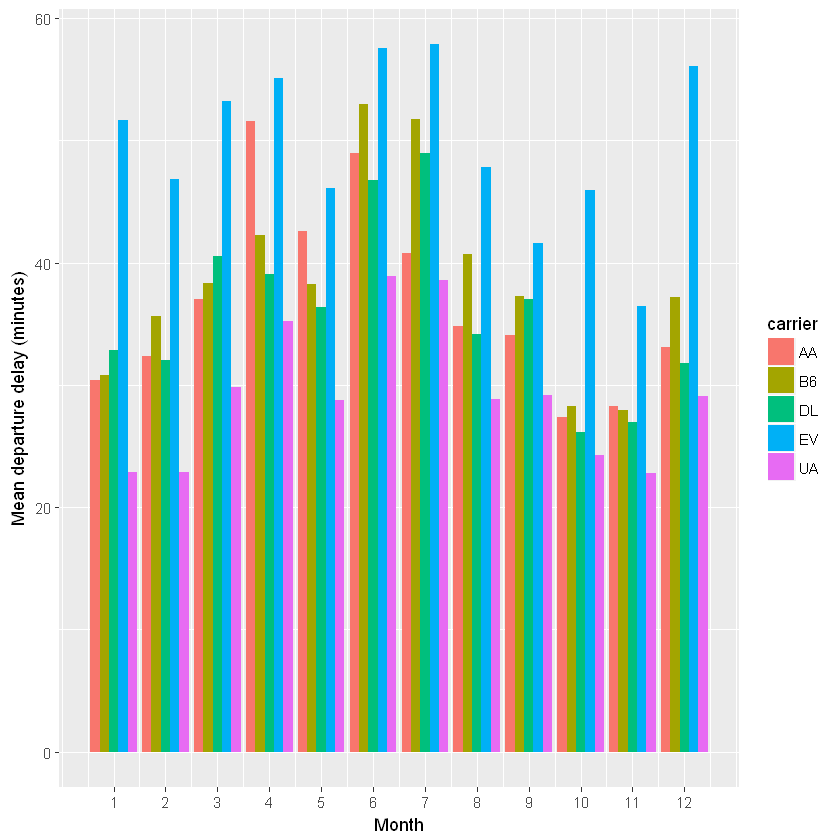

In [23]:

ggplot(data = flights_top5) + 
    geom_bar(mapping = aes(x = month,fill=carrier,y=mean_dep_delay),stat="identity", position="dodge") + 
    scale_x_continuous("Month",breaks=c(1,2,3,4,5,6,7,8,9,10,11,12)) + ylab("Mean departure delay (minutes)")